<h1><center>Lab 8</center></h1>

# **WORK DURING THE LAB**
- Implement the Ant System (AS) variant of Ant Colony Optimization (ACO) algorithm to
solve TSP.
  - Check what happens in one iteration for 10 ants.
  - Determine the global best after 10 iterations.
- Test the algorithm using different parameter settings.

### General TSP functions

In [1]:
import numpy as np

def load_tsp_data(file_name: str) -> list[tuple[float, float]]:
    """
    Load TSP data from file
    Input:
        file_name: str, name of the file containing TSP data
    Output:
        list of tuples: each tuple contains (x, y) coordinates of a city
    """
    with open(file_name) as f:
        lines = f.readlines()
        data = []
        start_reading = False
        for line in lines:
            if line.strip() == "NODE_COORD_SECTION":
                start_reading = True
                continue
            if start_reading:
                if line.strip() == "EOF":
                    break
                parts = line.split()
                data.append((float(parts[1]), float(parts[2])))
    return data

def euclidean_distance(city1: tuple[float, float], city2: tuple[float, float]) -> float:
    """
    Calculate the Euclidean distance between two cities
    Input:
        city1: tuple, (x, y) coordinates of city 1
        city2: tuple, (x, y) coordinates of city 2
    Output:
        float: Euclidean distance between the two cities
    """
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def random_tour(cities: list[tuple[float, float]]):
    """
    Generate random tours by shuffling the cities
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        list: list of random tours
    """
    n = len(cities)
    tour = np.random.permutation(n).tolist()
    return tour, fitness_tsp(cities, tour)


def fitness_tsp(cities: list[tuple[float, float]], tour: list[int]) -> float:
    """
    Calculate the total distance of the tour.
    Input:
        tour: list of city indices representing the tour
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
    Output:
        float: total distance of the tour
    """
    total_distance = 0.0
    n = len(tour)
    for i in range(n):
        total_distance += euclidean_distance(cities[tour[i]], cities[tour[(i + 1) % n]])  # Wrap around

    # Return distance rounded for better readability
    return round(total_distance, 2)



In [2]:
import random

def ant_system_tsp(cities: list[tuple[float, float]], num_ants: int=10, num_iterations: int=10, alpha: float=1.0, beta: float=5.0, rho: float=0.5, Q: float=100) -> tuple[list[int], float]:
    """
    Ant System (AS) for TSP
    Input:
        cities: list of tuples, each tuple contains (x, y) coordinates of a city
        num_ants: int, number of ants
        num_iterations: int, number of iterations
        alpha: float, pheromone importance
        beta: float, heuristic importance
        rho: float, pheromone evaporation rate
        Q: float, pheromone deposit factor
    Output:
        tuple: best tour and its length
    """
    num_cities = len(cities)

    # Place ants in nodes
    pheromone = np.ones((num_cities, num_cities))  # τ_ij (pheromone)
    heuristic = np.zeros((num_cities, num_cities))  # η_ij (visibility = inverse of distance)

    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                heuristic[i][j] = 1 / euclidean_distance(cities[i], cities[j])

    best_tour = None
    best_length = float('inf')

    for iteration in range(num_iterations):
        all_tours = []
        all_lengths = []

        for ant in range(num_ants):
            visited = []
            current_city = random.randint(0, num_cities - 1)
            visited.append(current_city)

            for _ in range(num_cities - 1):
                probabilities = []
                denom = sum((pheromone[current_city][j] ** alpha) * (heuristic[current_city][j] ** beta)
                            for j in range(num_cities) if j not in visited)

                for j in range(num_cities):
                    if j in visited:
                        probabilities.append(0)
                    else:
                        # rule to go from node i to node j
                        prob = ((pheromone[current_city][j] ** alpha) * (heuristic[current_city][j] ** beta)) / denom
                        probabilities.append(prob)

                next_city = np.random.choice(range(num_cities), p=probabilities)
                visited.append(next_city)
                current_city = next_city

            length = fitness_tsp(cities, visited)
            all_tours.append(visited)
            all_lengths.append(length)

            if length < best_length:
                best_length = length
                best_tour = visited

        # Pheromone evaporation
        pheromone = pheromone * (1-rho)

        # Pheromone trail update
        for k in range(num_ants):
            tour = all_tours[k]
            length = all_lengths[k]
            for i in range(num_cities):
                a, b = tour[i], tour[(i + 1) % num_cities]
                pheromone[a][b] += Q / length
                pheromone[b][a] += Q / length  # symmetric

    return best_tour, best_length

In [3]:
cities = load_tsp_data("data/tsp/kroE100.tsp")


In [13]:
_, best_length = ant_system_tsp(cities, num_ants=10, num_iterations=1, alpha=1.0, beta=5.0, rho=0.25, Q=100)
print("Best length:", best_length)

Best length: 29500.47


In [5]:
_, best_length = ant_system_tsp(cities, num_ants=15, num_iterations=10, alpha=2.0, beta=5.0, rho=0.1, Q=500)
print("Best length:", best_length)

Best length: 26966.47


In [16]:
_, best_length = ant_system_tsp(cities, num_ants=100, num_iterations=10, alpha=2.0, beta=5.0, rho=0.25, Q=100)
print("Best length:", best_length)

Best length: 25292.1


# **ASSIGNMENT A8**

- Implement the Ant Colony System (ACS) variant of ACO to solve TSP.
- Perform experiments for the two TSP instances selected in the previous labs.
- Test the algorithm using different parameter settings.

# Ant Colony System (ACS)
### Pseudocode:
        • REPEAT
         • Place ants in nodes (n)
         • REPEAT
        • State transition rule: Each ant increments
        the solution by an element
        • Local pheromone updating rule
         • UNTIL All ants created a solution
         • Global pheromone updating rule: Pheromone
        trails are updated globally
         • UNTIL STOP condition
 The Ant Colony System (ACS) is a variant of the Ant System (AS) algorithm for solving combinatorial optimization problems, particularly the Traveling Salesman Problem (TSP). ACS introduces several enhancements to the original AS algorithm, including:
 - **Pheromone initialization**: ACS initializes pheromone trails based on the average distance between cities, which helps to guide the ants more effectively.
 - **Local pheromone update**: In ACS, ants perform a local pheromone update on the edges they traverse during their tour. This helps to encourage exploration and prevents premature convergence.
 - **Global pheromone update**: Only the best ant in each iteration performs a global pheromone update, which allows for more effective exploitation of the best solutions found so far.
 - **Exploitation vs. exploration**: ACS uses a parameter (q0) to control the balance between exploitation and exploration. If a random number is less than q0, the ant chooses the best edge based on pheromone and heuristic information; otherwise, it samples from the probability distribution.
 - **Pheromone evaporation**: ACS uses a pheromone evaporation mechanism to reduce the influence of older pheromone trails, which helps to avoid convergence to suboptimal solutions.


In [18]:
def acs_tsp(cities: list[tuple[float, float]], num_ants: int = 10, num_iterations: int = 10,
            alpha: float = 1.0, beta: float = 5.0, rho: float = 0.1, xi: float = 0.1, q0: float = 0.9) -> tuple[list[int], float]:
    """
    Ant Colony System (ACS) for TSP
    Input:
        - cities: list of tuples, each tuple contains (x, y) coordinates of a city
        - num_ants: int, number of ants
        - num_iterations: int, number of iterations
        - alpha: float, pheromone importance
        - beta: float, heuristic importance
        - rho: float, pheromone evaporation rate (global update)
        - xi: float, pheromone decay rate (local update)
        - q0: float, exploitation probability
    Output:
        - tuple: best tour and its length
    """
    num_cities = len(cities)
    pheromone = np.ones((num_cities, num_cities))
    heuristic = np.zeros((num_cities, num_cities))

    # Precompute heuristic (η_ij = 1 / distance)
    for i in range(num_cities):
        for j in range(num_cities):
            if i != j:
                heuristic[i][j] = 1 / euclidean_distance(cities[i], cities[j])
            else:
                heuristic[i][j] = 0.0

    # Initialize pheromone trails to balance for problem size
    tau0 = 1 / (num_cities * np.mean([euclidean_distance(cities[i], cities[j]) for i in range(num_cities) for j in range(i + 1, num_cities)]))
    pheromone.fill(tau0)

    best_tour = None
    best_length = float('inf')

    for iteration in range(num_iterations):
        all_tours = []
        all_lengths = []

        for ant in range(num_ants):
            visited = []
            current_city = random.randint(0, num_cities - 1)
            visited.append(current_city)

            for _ in range(num_cities - 1):
                candidates = [j for j in range(num_cities) if j not in visited]
                q = random.random()

                if q <= q0:
                    # Exploitation: choose best edge
                    next_city = max(
                        candidates,
                        key=lambda j: (pheromone[current_city][j] ** alpha) * (heuristic[current_city][j] ** beta)
                    )
                else:
                    # Biased exploration: probabilistic choice
                    denom = sum((pheromone[current_city][j] ** alpha) * (heuristic[current_city][j] ** beta) for j in candidates)
                    probabilities = [
                        ((pheromone[current_city][j] ** alpha) * (heuristic[current_city][j] ** beta)) / denom
                        for j in candidates
                    ]
                    # random based on Ant System probability distribution
                    next_city = np.random.choice(candidates, p=probabilities)

                visited.append(next_city)

                # Local pheromone update
                pheromone[current_city][next_city] = (1 - xi) * pheromone[current_city][next_city] + xi * tau0
                pheromone[next_city][current_city] = pheromone[current_city][next_city]  # symmetric
                current_city = next_city

            length = fitness_tsp(cities, visited)
            all_tours.append(visited)
            all_lengths.append(length)

            if length < best_length:
                best_length = length
                best_tour = visited

        # Global pheromone update (only best ant)
        for i in range(num_cities):
            a, b = best_tour[i], best_tour[(i + 1) % num_cities]
            pheromone[a][b] = (1 - rho) * pheromone[a][b] + rho * (1 / best_length)
            pheromone[b][a] = pheromone[a][b] # symmetric

    return best_tour, best_length


In [25]:
# test acs
_, best_length = acs_tsp(cities, num_ants=100, num_iterations=10, alpha=1.0, beta=5.0, rho=0.25, xi=0.1, q0=0.9)
print("Best length:", best_length)

Best length: 24108.62


# Test the algorithm for `kroE100.tsp`

In [32]:
import matplotlib.pyplot as plt
import time

def test_acs_tsp(cities, num_ants_list, num_iterations_list, alpha=1.0, beta=5.0, rho=0.1, xi=0.1, q0=0.9):

    results = {}
    table_md = "| Num Ants | Num Iterations | Best Length | Computation Time (s) |\n"
    table_md += "|----------|----------------|-------------|----------------------|\n"

    # Run ACS TSP for each combination of num_ants and num_iterations
    for num_ants in num_ants_list:
        best_lengths = []
        computation_times = []
        for num_iterations in num_iterations_list:
            start_time = time.time()  # Start timing
            _, best_length = acs_tsp(
                cities, num_ants=num_ants, num_iterations=num_iterations,
                alpha=alpha, beta=beta, rho=rho, xi=xi, q0=q0
            )
            end_time = time.time()  # End timing
            computation_time = end_time - start_time

            best_lengths.append(best_length)
            computation_times.append(computation_time)
            table_md += f"| {num_ants:<8} | {num_iterations:<14} | {best_length:<11.2f} | {computation_time:<20.4f} |\n"
        results[num_ants] = (best_lengths, computation_times)

    # Print Markdown table
    print(table_md)

    # Plot results
    plt.figure(figsize=(10, 6))
    for num_ants, (best_lengths, _) in results.items():
        plt.plot(num_iterations_list, best_lengths, marker='o', label=f'Num Ants = {num_ants}')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Best Tour Length')
    plt.title('ACS TSP: Best Tour Length vs. Iterations')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

| Num Ants | Num Iterations | Best Length | Computation Time (s) |
|----------|----------------|-------------|----------------------|
| 1        | 1              | 29197.80    | 0.0227               |
| 1        | 10             | 26474.57    | 0.0952               |
| 1        | 100            | 23883.94    | 0.6934               |
| 1        | 1000           | 23738.20    | 7.4300               |
| 10       | 1              | 25383.93    | 0.0723               |
| 10       | 10             | 24718.28    | 0.7182               |
| 10       | 100            | 24296.92    | 5.8754               |
| 10       | 1000           | 22931.81    | 64.3846              |
| 100      | 1              | 24652.55    | 0.7145               |
| 100      | 10             | 24449.90    | 6.9951               |
| 100      | 100            | 24173.29    | 67.1393              |
| 100      | 1000           | 23660.06    | 648.8915             |



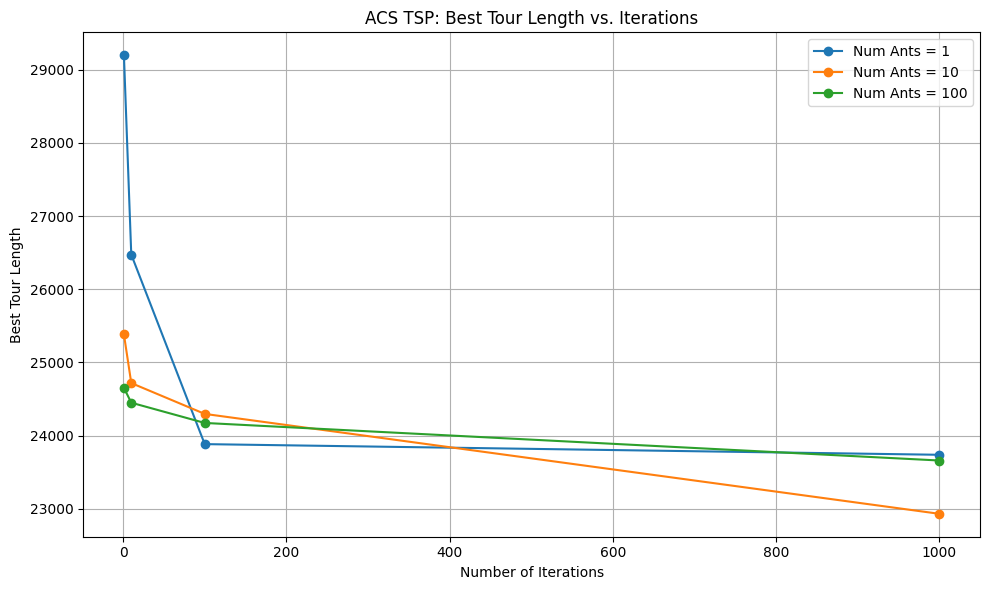

In [33]:
# Test parameters
num_ants_list = [1, 10, 100]
num_iterations_list = [1, 10, 100, 1000]

# Load TSP data
cities = load_tsp_data("data/tsp/kroE100.tsp")

# Run the test
test_acs_tsp(cities, num_ants_list, num_iterations_list, alpha=1.0, beta=5.0, rho=0.1, xi=0.1, q0=0.9)

# **Conclusions and observations**
- The ACS algorithm is more efficient than the AS algorithm, as it converges faster to a solution.
- The best tour length improves with an increase in the number of ants and iterations.
- The computation time increases with the number of ants and iterations.

### Table of results
| Num Ants | Num Iterations | Best Length | Computation Time (s) |
|----------|----------------|-------------|----------------------|
| 1        | 1              | 29197.80    | 0.0227               |
| 1        | 10             | 26474.57    | 0.0952               |
| 1        | 100            | 23883.94    | 0.6934               |
| 1        | 1000           | 23738.20    | 7.4300               |
| 10       | 1              | 25383.93    | 0.0723               |
| 10       | 10             | 24718.28    | 0.7182               |
| 10       | 100            | 24296.92    | 5.8754               |
| 10       | 1000           | 22931.81    | 64.3846              |
| 100      | 1              | 24652.55    | 0.7145               |
| 100      | 10             | 24449.90    | 6.9951               |
| 100      | 100            | 24173.29    | 67.1393              |
| 100      | 1000           | 23660.06    | 648.8915             |

In [48]:
def test_acs_tsp_with_params(cities, num_ants, num_iterations, param_configs):
    """
    Test ACS TSP with different parameter settings and plot results.
    Input:
        - cities: list of tuples, each tuple contains (x, y) coordinates of a city
        - num_ants: int, number of ants
        - num_iterations: int, number of iterations
        - param_configs: list of dicts, each dict contains parameter settings (alpha, beta, rho, xi, q0)
    """
    results = []
    labels = []

    for params in param_configs:
        start_time = time.time()
        _, best_length = acs_tsp(
            cities, num_ants=num_ants, num_iterations=num_iterations,
            alpha=params['alpha'], beta=params['beta'], rho=params['rho'],
            xi=params['xi'], q0=params['q0']
        )
        end_time = time.time()
        computation_time = end_time - start_time

        results.append(best_length)
        # Create a label with parameter values
        labels.append(f"α={params['alpha']}, β={params['beta']}, ρ={params['rho']}, ξ={params['xi']}, q₀={params['q0']}")
        print(f"Params: {labels[-1]} | Computation Time: {computation_time:.4f} seconds")

    # Create bar plot
    x = range(len(param_configs))
    plt.figure(figsize=(12, 6))
    plt.bar(x, results, color='b', alpha=0.6)
    plt.xlabel('Parameter Configurations')
    plt.ylabel('Best Length')
    plt.title('ACS TSP: Comparison of Parameter Configurations')
    plt.xticks(x, labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Testing the algorithm with different q0 values (exploitation vs exploration)

Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.1 | Computation Time: 1.9687 seconds
Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.3 | Computation Time: 1.6341 seconds
Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.5 | Computation Time: 1.2009 seconds
Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.7 | Computation Time: 0.9796 seconds
Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.9 | Computation Time: 0.7100 seconds


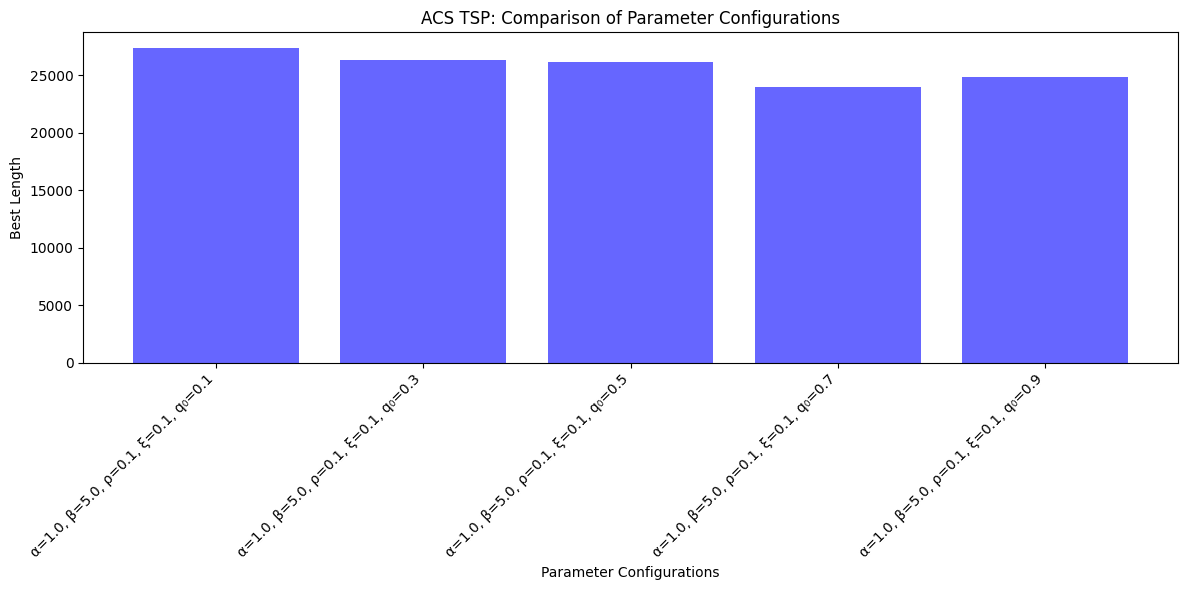

In [51]:
# Example usage
cities = load_tsp_data("data/tsp/kroE100.tsp")
num_ants = 10
num_iterations = 10
param_configs = [
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.1},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.3},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.5},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.9}
]
test_acs_tsp_with_params(cities, num_ants, num_iterations, param_configs)


#### **Observation** : Best q0 after short tests: `0.7`
### Testing for different rho (pheromone evaporation rate) and xi (local pheromone update rate)

Params: α=1.0, β=5.0, ρ=0.1, ξ=0.1, q₀=0.7 | Computation Time: 1.3162 seconds
Params: α=1.0, β=5.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 1.3099 seconds
Params: α=1.0, β=5.0, ρ=0.3, ξ=0.2, q₀=0.7 | Computation Time: 0.9769 seconds
Params: α=1.0, β=5.0, ρ=0.4, ξ=0.3, q₀=0.7 | Computation Time: 0.9270 seconds
Params: α=1.0, β=5.0, ρ=0.5, ξ=0.4, q₀=0.7 | Computation Time: 0.9362 seconds


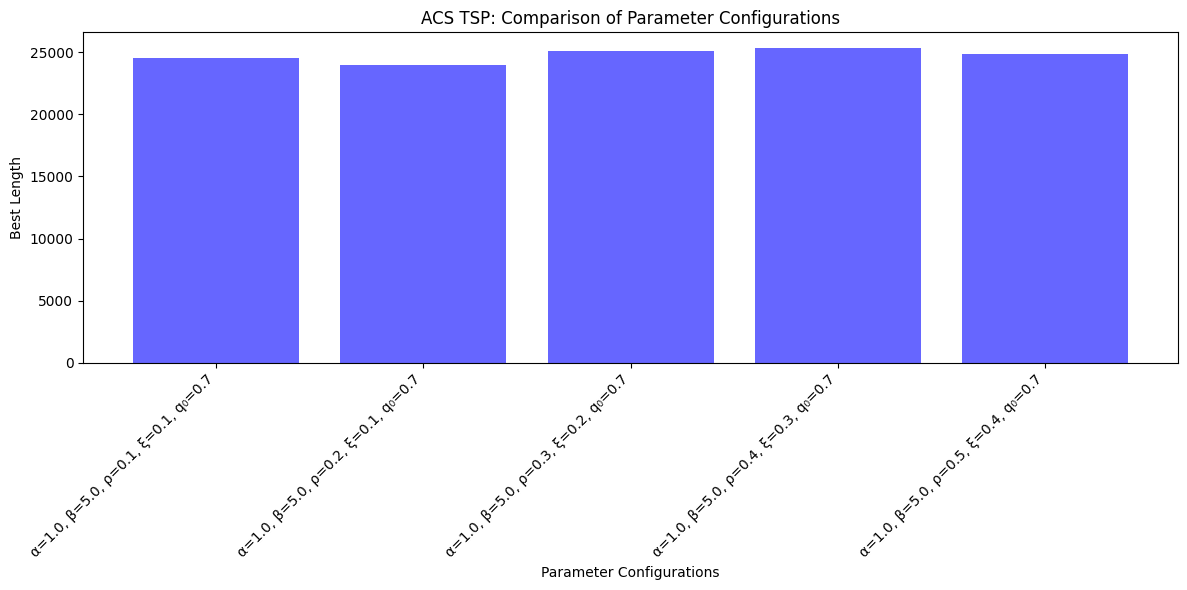

In [52]:
# Example usage
cities = load_tsp_data("data/tsp/kroE100.tsp")
num_ants = 10
num_iterations = 10
param_configs = [
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.1, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.3, 'xi': 0.2, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.4, 'xi': 0.3, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 5.0, 'rho': 0.5, 'xi': 0.4, 'q0': 0.7}
]
test_acs_tsp_with_params(cities, num_ants, num_iterations, param_configs)


#### Observation : Best rho: `0.2` and xi: `0.1`
### Testing for different alpha and beta values

Params: α=0.5, β=2.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 1.3422 seconds
Params: α=1.0, β=3.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 1.0349 seconds
Params: α=1.5, β=4.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 0.9206 seconds
Params: α=2.0, β=5.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 0.9208 seconds
Params: α=2.5, β=6.0, ρ=0.2, ξ=0.1, q₀=0.7 | Computation Time: 0.9239 seconds


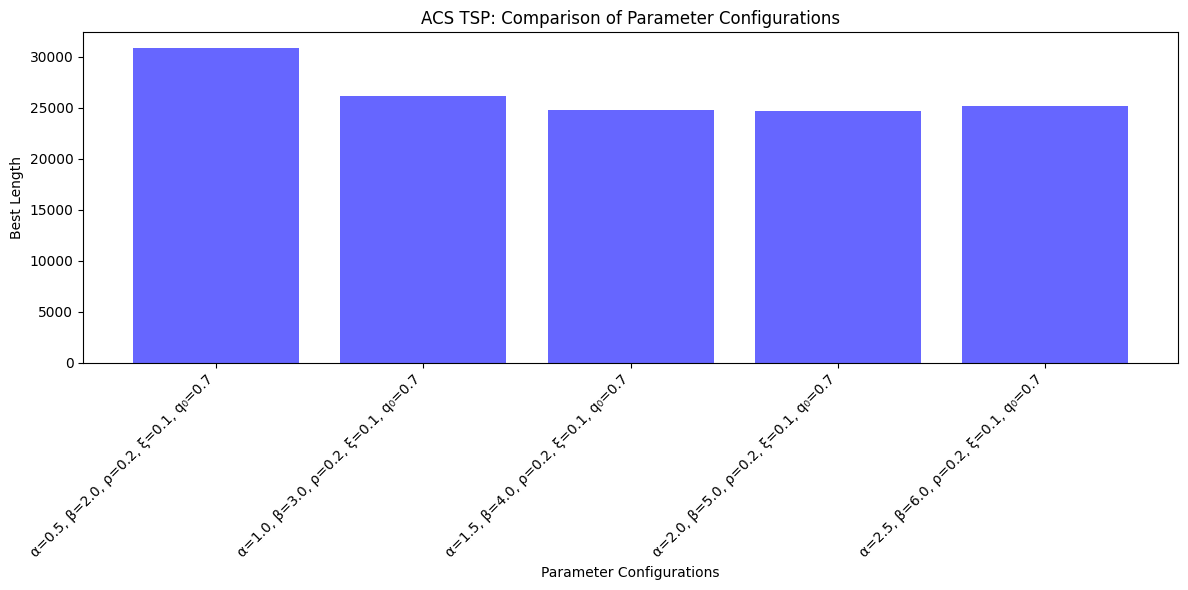

In [53]:
# Example usage
cities = load_tsp_data("data/tsp/kroE100.tsp")
num_ants = 10
num_iterations = 10
param_configs = [
    {'alpha': 0.5, 'beta': 2.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 1.0, 'beta': 3.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 1.5, 'beta': 4.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 2.0, 'beta': 5.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7},
    {'alpha': 2.5, 'beta': 6.0, 'rho': 0.2, 'xi': 0.1, 'q0': 0.7}
]
test_acs_tsp_with_params(cities, num_ants, num_iterations, param_configs)


### Conclusions:
- The ACS algorithm is sensitive to the parameters alpha, beta, rho, xi, and q0.
- Good parameter settings for the given TSP instance (kroE100.tsp) following short testing:
  - **alpha**: 1.5
  - **beta**: 4.0
  - **rho**: 0.2
  - **xi**: 0.1
  - **q0**: 0.7

# Test the algorithm for `uy734.tsp`

| Num Ants | Num Iterations | Best Length | Computation Time (s) |
|----------|----------------|-------------|----------------------|
| 1        | 1              | 101585.10   | 2.5974               |
| 1        | 10             | 98809.25    | 13.3254              |
| 10       | 1              | 99853.05    | 12.9304              |
| 10       | 10             | 96238.11    | 117.5680             |



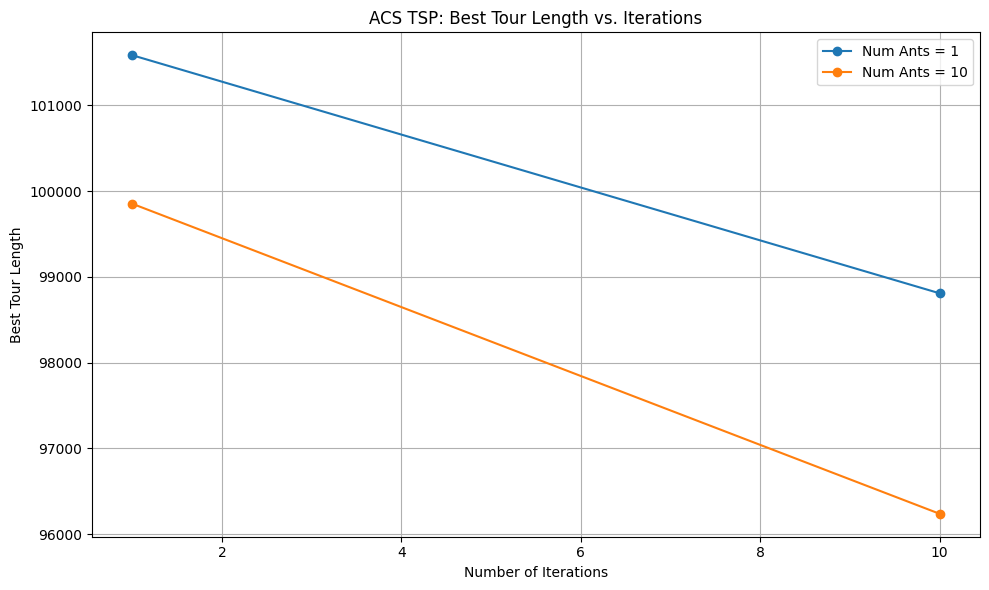

In [41]:
cities = load_tsp_data("data/tsp/uy734.tsp")

num_ants_list = [1, 5, 10]
num_iterations_list = [1, 3, 5]

test_acs_tsp(cities, num_ants_list, num_iterations_list, alpha=1.0, beta=5.0, rho=0.1, xi=0.1, q0=0.9)

# **Conclusions and observations**
- ACS runs slow for a big TSP (over 100 cities)
- The best tour length improves with an increase in the number of ants and iterations.
- This algorithm might not be the best choice for large TSP instances, because it requires a lot of computation time for good results.

### Table of results
| Num Ants | Num Iterations | Best Length | Computation Time (s) |
|----------|----------------|-------------|----------------------|
| 1        | 1              | 101585.10   | 2.5974               |
| 1        | 10             | 98809.25    | 13.3254              |
| 10       | 1              | 99853.05    | 12.9304              |
| 10       | 10             | 96238.11    | 117.5680             |

| Iterations | AS Best Length | AS Time (s) | ACS Best Length | ACS Time (s) |
|------------|----------------|-------------|-----------------|--------------|
| 1          | 30527.83       | 0.3130      | 27331.78        | 0.1243       |
| 10         | 25350.91       | 2.7226      | 25084.61        | 0.8943       |
| 20         | 28342.39       | 4.5430      | 24924.39        | 1.5583       |
| 50         | 24969.16       | 10.4572     | 25098.70        | 3.8760       |
| 100        | 24583.56       | 23.6955     | 24469.13        | 8.0501       |
| 150        | 24420.87       | 31.9176     | 24254.29        | 11.5403      |
| 200        | 24072.73       | 45.5676     | 24148.77        | 15.4565      |
| 300        | 24322.12       | 63.6299     | 24302.40        | 23.5448      |



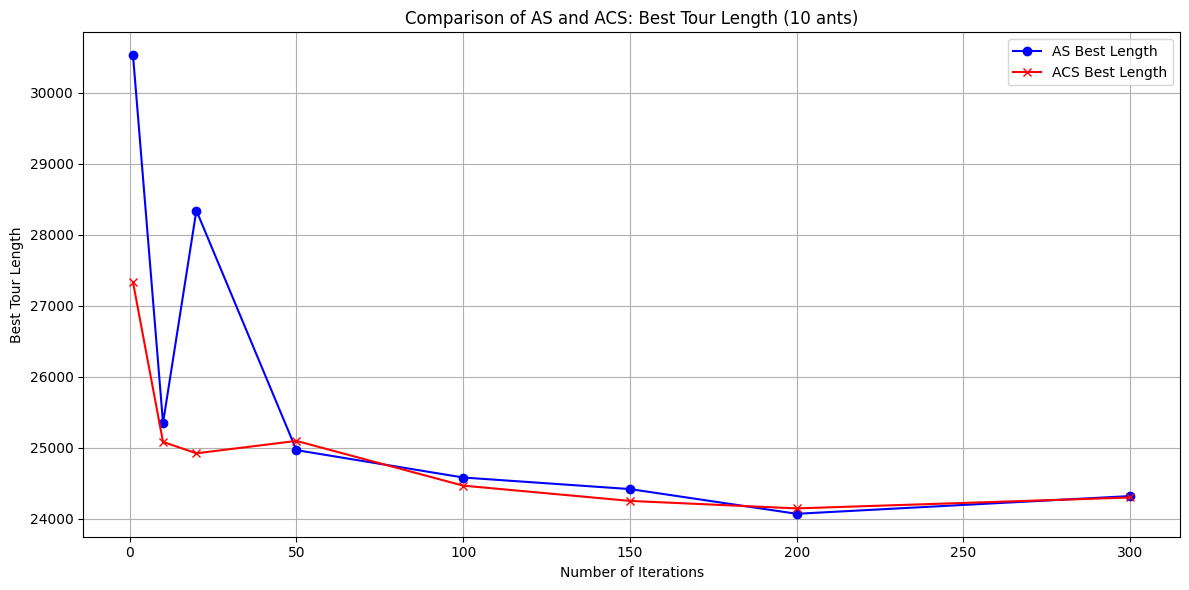

In [63]:
import time

def compare_as_acs_with_plot(cities, num_ants, iteration_numbers, alpha, beta, rho, xi, q0):
    """
    Compare AS and ACS for different iteration numbers, print results in Markdown table format,
    and plot only the best lengths for each algorithm.
    """
    as_lengths = []
    acs_lengths = []
    as_times = []
    acs_times = []

    # Prepare Markdown table header
    table_md = "| Iterations | AS Best Length | AS Time (s) | ACS Best Length | ACS Time (s) |\n"
    table_md += "|------------|----------------|-------------|-----------------|--------------|\n"

    for iterations in iteration_numbers:
        # Run Ant System (AS)
        start_time = time.time()
        _, best_length_as = ant_system_tsp(
            cities, num_ants=num_ants, num_iterations=iterations,
            alpha=alpha, beta=beta, rho=rho
        )
        as_time = time.time() - start_time
        as_lengths.append(best_length_as)
        as_times.append(as_time)

        # Run Ant Colony System (ACS)
        start_time = time.time()
        _, best_length_acs = acs_tsp(
            cities, num_ants=num_ants, num_iterations=iterations,
            alpha=alpha, beta=beta, rho=rho, xi=xi, q0=q0
        )
        acs_time = time.time() - start_time
        acs_lengths.append(best_length_acs)
        acs_times.append(acs_time)

        # Add results to the Markdown table
        table_md += f"| {iterations:<10} | {best_length_as:<14.2f} | {as_time:<11.4f} | {best_length_acs:<15.2f} | {acs_time:<12.4f} |\n"

    # Print the Markdown table
    print(table_md)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(iteration_numbers, as_lengths, marker='o', linestyle='-', label='AS Best Length', color='blue')
    plt.plot(iteration_numbers, acs_lengths, marker='x', linestyle='-', label='ACS Best Length', color='red')

    plt.xlabel('Number of Iterations')
    plt.ylabel('Best Tour Length')
    plt.title('Comparison of AS and ACS: Best Tour Length (10 ants)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
cities = load_tsp_data("data/tsp/kroE100.tsp")
num_ants = 10
iteration_numbers = [1, 10, 20, 50, 100, 150, 200, 300]
alpha = 1.0
beta = 5.0
rho = 0.1
xi = 0.1
q0 = 0.7

compare_as_acs_with_plot(cities, num_ants, iteration_numbers, alpha, beta, rho, xi, q0)

## Ant System (AS) vs Ant Colony System (ACS)

### Results:
| Iterations | AS Best Length | AS Time (s) | ACS Best Length | ACS Time (s) |
|------------|----------------|-------------|-----------------|--------------|
| 1          | 30527.83       | 0.3130      | 27331.78        | 0.1243       |
| 10         | 25350.91       | 2.7226      | 25084.61        | 0.8943       |
| 20         | 28342.39       | 4.5430      | 24924.39        | 1.5583       |
| 50         | 24969.16       | 10.4572     | 25098.70        | 3.8760       |
| 100        | 24583.56       | 23.6955     | 24469.13        | 8.0501       |
| 150        | 24420.87       | 31.9176     | 24254.29        | 11.5403      |
| 200        | 24072.73       | 45.5676     | 24148.77        | 15.4565      |
| 300        | 24322.12       | 63.6299     | 24302.40        | 23.5448      |

###  Summary of Results:

| Aspect              | AS                                     | ACS                                     |
|---------------------|-----------------------------------------|------------------------------------------|
| Solution Quality    | Improves over time, but more slowly     | Reaches better solutions more quickly    |
| Speed               | Slower at all iteration levels          | Consistently faster                      |
| Early Performance   | Weaker results in initial iterations    | Strong early solutions due to exploitation |
| Long-Term Quality   | Competitive, may plateau                | Slightly better convergence overall      |

### Key Observations:
- ACS finds better or comparable solutions in less time across most iteration levels.
- AS improves gradually but requires significantly more computation time.
- ACS benefits from a balance of exploitation and biased exploration, accelerating convergence.
